# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
  Dataset yang saya gunakan adalah dataset dari Kaggle yang diberikan sebagai contoh oleh pihak Dicoding untuk menyelesaikan Submission kelas ini. Dataset ini bernama **Bank Transaction Dataset for Fraud Detection**. Dataset ini dirancang untuk analisis transaksi perbankan dan sering digunakan untuk mendeteksi pola atau anomali. Dataset dapat diakses melalui tautan berikut:
  
  🔗 [Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)

2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas. Ketentuan ini sudah terpenuhi, karena setelah saya cek di Dataset ini belum ada label.
   - **Jumlah Baris**: Dataset yang saya  gunakan setelah dicek terdapat 2512 baris berdasarkan informasi dari Kaggle.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**. Dataset saya mengandung kombinasi data kategorikal dan numerikal, sesuai dengan ketentuan yang diberikan. Berikut adalah rinciannya berdasarkan kolom yang ada
     - *Kategorikal*: Beberapa diantaranya adalah Channel (Onlin/ATM/Branch), TransactionType, CostumerOccupation.
     - *Numerikal*: Contohnya CustomerAge, AccountBalance, TransactionAmount

3. **Pembatasan**:  
   Dataset yang digunakan tidak pernah dilakukan latihan clustering sebelumnya sehingga cocok digunakan untuk tugas ini.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1191]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk clustering
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

# Import algoritma clustering
from sklearn.cluster import KMeans, DBSCAN

# Import metrik evaluasi untuk clustering
from sklearn.metrics import silhouette_score

# Import preprocessing tools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import teknik seleksi fitur
from sklearn.feature_selection import SelectKBest, f_classif

# Import metode reduksi dimensi
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [1192]:
# Memuat dataset dari file CSV
df = pd.read_csv('bank_transactions_data_2.csv')

In [1193]:
# Menampilkan lima baris pertama dari dataset
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Dataset yang digunakan dalam proyek ini adalah Bank Transaction Dataset for Fraud Detection yang diambil dari Kaggle. Dataset ini berisi informasi transaksi perbankan dan memiliki berbagai fitur numerikal serta kategorikal yang dapat digunakan untuk clustering.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [1194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

**Informasi Dataset:**

* Dataset ini memiliki 2512 entri dengan 16 kolom.

* Terdapat 5 kolom numerik yang terdiri dari 3 kolom bertipe int64, 2 kolom bertipe float64, dan 11 kolom bertipe objek (string).

* Beberapa kolom yang berisi data transaksi termasuk TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, dan lain-lain. Namun, terdapat kesalahan tipe data pada fitur `TransactionDate` dan `PreviousTransactionDate`.

In [1195]:
# Menghapus atau Menangani Data Kosong (Missing Values)
print("Jumlah Missing Values:\n", df.isnull().sum())

Jumlah Missing Values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Tidak terdapat missing value dalam data.

In [1196]:
# Menampilkan jumlah data duplikat
duplicate_rows = df[df.duplicated()] # Change 'dataset' to 'df'
print(f"Jumlah duplikat dalam dataset: {duplicate_rows.shape[0]}")

# Menampilkan data yang duplikat (jika ada)
if not duplicate_rows.empty:
    print("\nData yang terduplikasi:")
    print(duplicate_rows)
else:
    print("\nTidak ada data duplikat dalam dataset.")

Jumlah duplikat dalam dataset: 0

Tidak ada data duplikat dalam dataset.


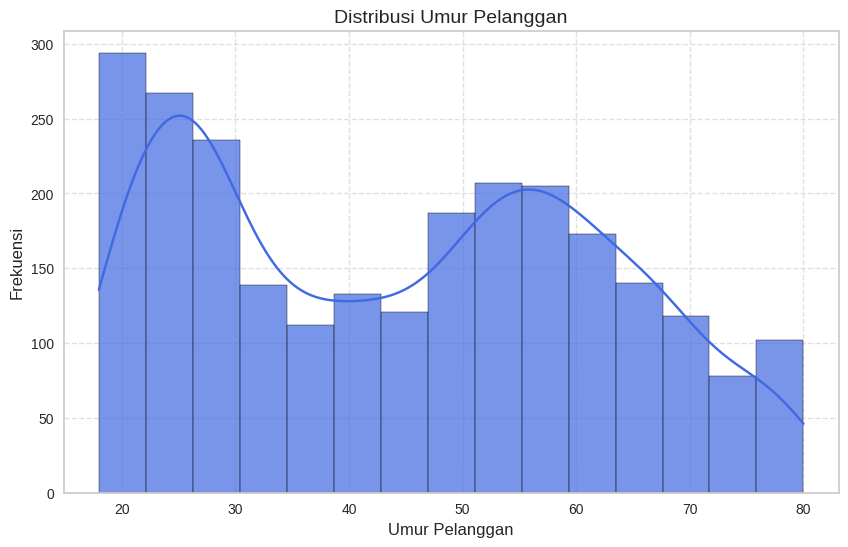

In [1197]:
# Menghitung distribusi umur pelanggan
plt.figure(figsize=(10, 6))
sns.histplot(df["CustomerAge"], bins=15, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

# Menambahkan judul dan label sumbu
plt.title("Distribusi Umur Pelanggan", fontsize=14)
plt.xlabel("Umur Pelanggan", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

# Menampilkan grid dengan garis putus-putus
plt.grid(True, linestyle="--", alpha=0.6)

# Menampilkan plot
plt.show()

Jumlah pelanggan paling banyak terkonsentrasi pada kelompok usia 20–25 tahun dan 50–55 tahun. Kelompok usia 20–30 tahun juga memiliki frekuensi yang relatif lebih tinggi dibandingkan kelompok usia lainnya. Pola distribusi ini menunjukkan adanya kecenderungan pada kelompok usia tertentu, mencerminkan karakteristik demografis pelanggan yang jelas.

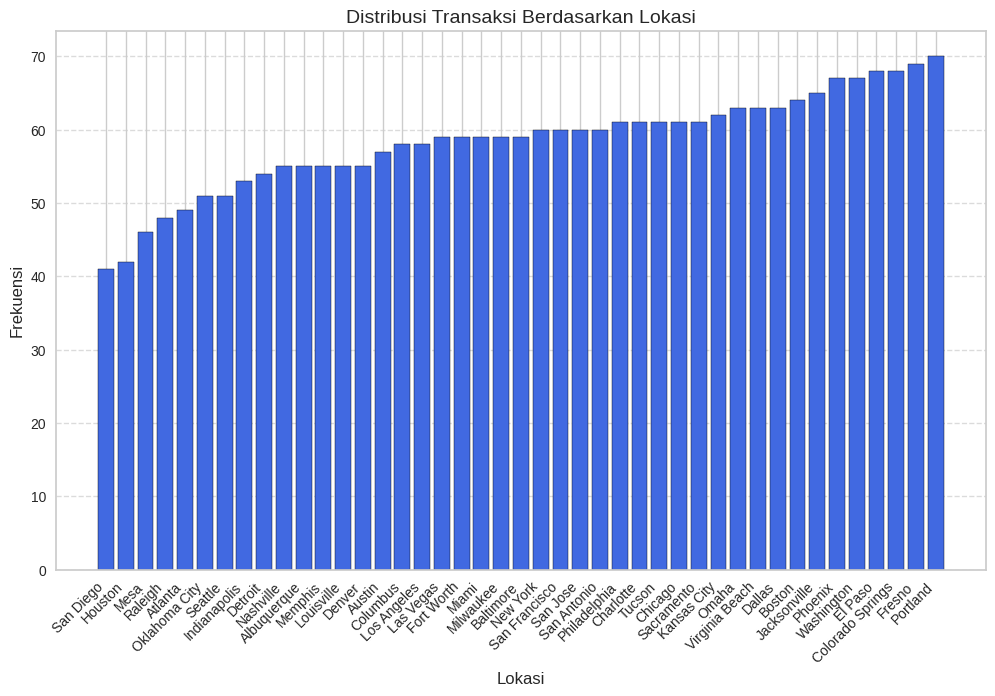

In [1198]:
# Menampilkan distribusi transaksi berdasarkan lokasi dengan diagram batang
plt.figure(figsize=(12, 7))

plt.bar(
    df["Location"].unique(),
    height=df["Location"].value_counts().sort_values(),
    color="royalblue",
    edgecolor='black'
)

# Menambahkan judul dan label sumbu
plt.title("Distribusi Transaksi Berdasarkan Lokasi", fontsize=14)
plt.xlabel("Lokasi", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

plt.xticks(rotation=45, ha="right")

# Menampilkan grid pada sumbu Y
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan grafik
plt.show()

Mayoritas transaksi dilakukan di kota Portland, yang mencatatkan jumlah transaksi tertinggi. Sebaliknya, kota San Diego memiliki jumlah transaksi paling rendah di antara lokasi lainnya.

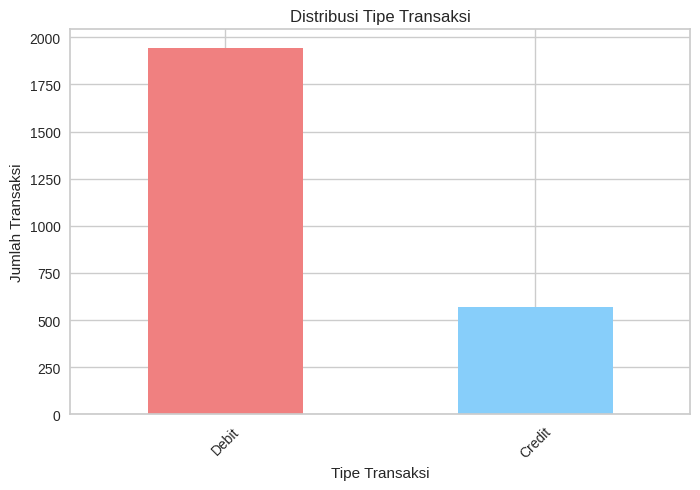

In [1199]:
# Menghitung jumlah transaksi per tipe
transaction_counts = df["TransactionType"].value_counts()

# Membuat diagram batang
plt.figure(figsize=(8, 5))
transaction_counts.plot(kind='bar', color=['lightcoral', 'lightskyblue'])

# Menambahkan judul dan label
plt.title('Distribusi Tipe Transaksi')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

Dari distribusi tipe transaksi, terlihat bahwa transaksi debit lebih dominan dibandingkan credit, menunjukkan bahwa sebagian besar pengguna lebih sering melakukan pembayaran atau penarikan dana daripada menerima dana. Sebaliknya, transaksi credit memiliki frekuensi yang lebih rendah, yang mungkin mengindikasikan bahwa pemasukan ke akun lebih jarang terjadi dibandingkan pengeluaran.

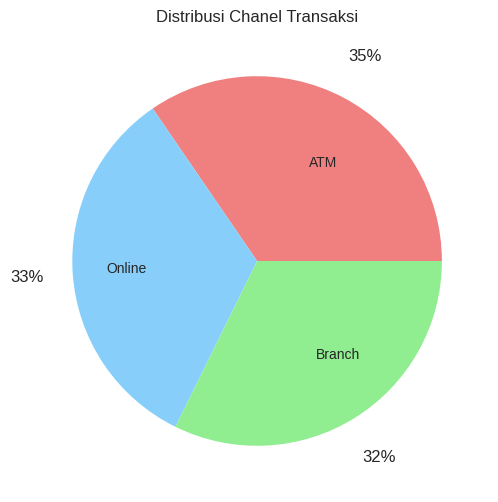

In [1200]:
# Menghitung dan menampilkan distribusi tipe transaksi menggunakan diagram pie
fig, ax = plt.subplots(figsize=(10, 6))

# Membuat diagram pie untuk distribusi kanal transaksi
ax.pie(
    df["Channel"].value_counts(),
    labels=df["Channel"].unique(),
    autopct='%1.0f%%',
    pctdistance=1.25,
    labeldistance=0.6,
    colors=['lightcoral', 'lightskyblue', 'lightgreen', 'orange']
)

# Menambahkan judul pada grafik
ax.set_title('Distribusi Chanel Transaksi')

# Menampilkan grafik
plt.show()

Saluran transaksi yang paling dominan adalah ATM, dengan penggunaan mencapai 35%. Sementara itu, transaksi yang dilakukan secara branch menunjukkan persentase terendah, yakni sebesar 33%.

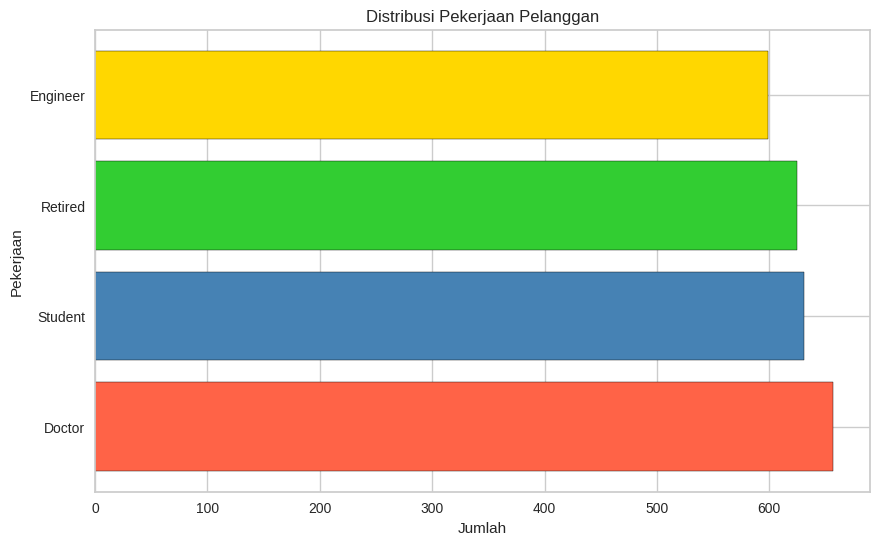

In [1201]:
# Visualisasi distribusi pekerjaan pelanggan menggunakan diagram batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(
    df["CustomerOccupation"].unique(),
    width=df["CustomerOccupation"].value_counts(),
    color=["#FF6347", "#4682B4", "#32CD32", "#FFD700"],
    edgecolor='black'
)

# Menambahkan judul pada grafik
plt.title('Distribusi Pekerjaan Pelanggan')

# Menambahkan label pada sumbu X dan Y
plt.xlabel('Jumlah')
plt.ylabel('Pekerjaan')

# Menampilkan grafik
plt.show()

Sebagian besar pelanggan berasal dari profesi `Doctor`, yang menunjukkan jumlah tertinggi dalam distribusi. Di sisi lain, profesi `Engineer` tercatat sebagai yang paling sedikit di antara semua kategori pekerjaan pelanggan.

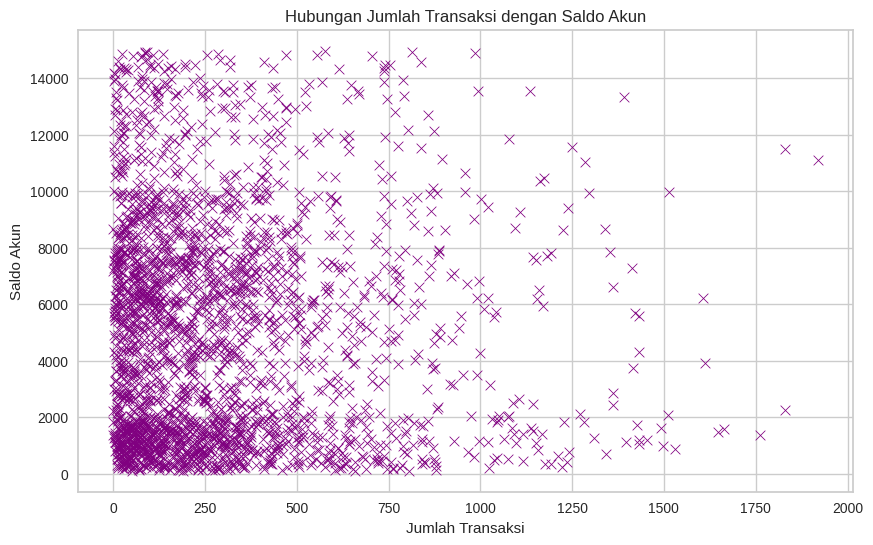

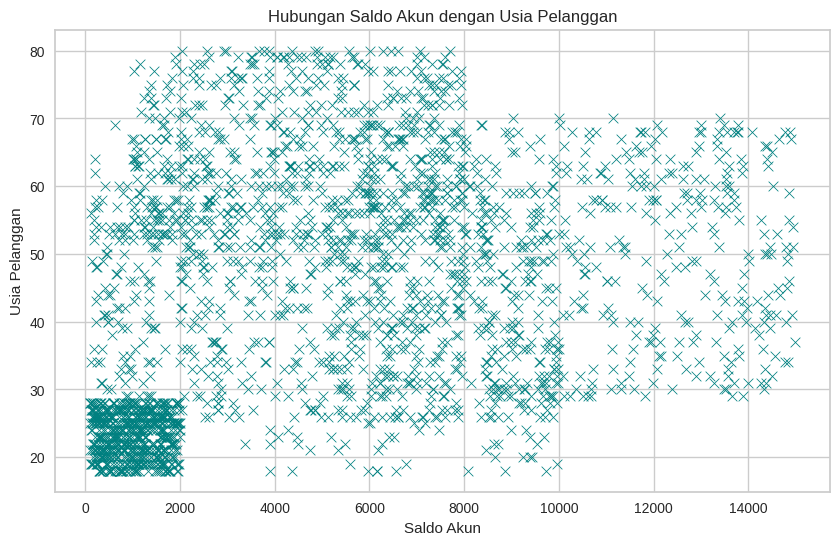

In [1202]:
# Visualisasi hubungan antara Jumlah Transaksi dan Saldo Akun menggunakan diagram sebar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', color='purple', marker='x')
plt.title('Hubungan Jumlah Transaksi dengan Saldo Akun')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Saldo Akun')
plt.show()

# Visualisasi hubungan antara Saldo Akun dan Usia Pelanggan menggunakan diagram sebar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccountBalance', y='CustomerAge', color='teal', marker='x')
plt.title('Hubungan Saldo Akun dengan Usia Pelanggan')
plt.xlabel('Saldo Akun')
plt.ylabel('Usia Pelanggan')
plt.show()

1. **Hubungan Jumlah Transaksi dengan Saldo Akun**  
   Scatter plot menunjukkan bahwa tidak ada korelasi yang jelas antara jumlah transaksi dan saldo akun. Namun, beberapa transaksi dengan jumlah besar tampak terjadi pada akun dengan saldo tinggi, yang bisa mengindikasikan bahwa pelanggan dengan saldo lebih besar cenderung melakukan transaksi dalam jumlah besar.  

2. **Hubungan Saldo Akun dengan Usia Pelanggan**  
   Distribusi data menunjukkan bahwa saldo akun tersebar di berbagai rentang usia tanpa pola yang jelas. Namun, ada indikasi bahwa beberapa pelanggan dengan saldo tinggi berasal dari kelompok usia yang lebih tua, yang mungkin menunjukkan bahwa pelanggan yang lebih berpengalaman atau mapan memiliki saldo lebih besar dibandingkan yang lebih muda.  


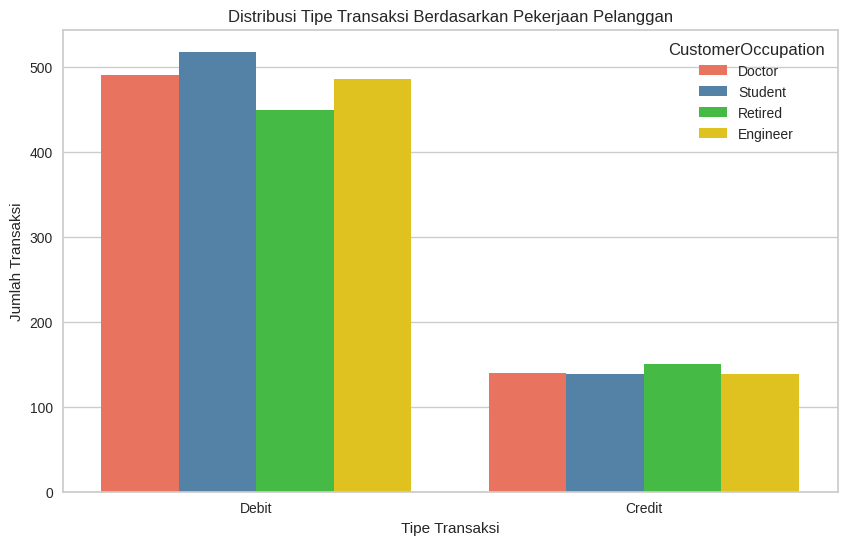

In [1203]:
# Visualisasi jumlah transaksi berdasarkan jenis transaksi dan pekerjaan pelanggan
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionType', hue='CustomerOccupation', data=df, palette=["#FF6347", "#4682B4", "#32CD32", "#FFD700"])
plt.title('Distribusi Tipe Transaksi Berdasarkan Pekerjaan Pelanggan')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

**Insight dari Grafik**  

1. **Transaksi Debit Lebih Dominan**  
   - Jumlah transaksi debit jauh lebih banyak dibandingkan credit di semua kategori pekerjaan pelanggan.   

2. **Student Memiliki Jumlah Transaksi Debit Tertinggi**  
   - Student memiliki jumlah transaksi debit tertinggi dibandingkan profesi lain.  
   - Hal ini bisa mengindikasikan bahwa student lebih sering menggunakan transaksi non-kredit untuk kebutuhan sehari-hari.  

3. **Retired Cenderung Stabil dalam Transaksi**  
   - Kelompok Retired memiliki jumlah transaksi yang cukup tinggi, tetapi tidak seagresif kelompok Student dan Engineer.  


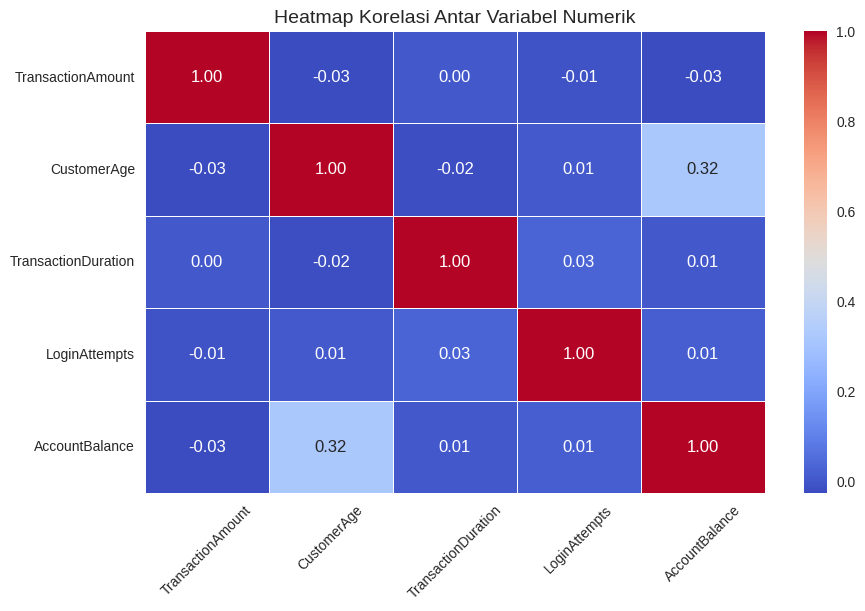

In [1204]:
# Heatmap Korelasi Antar Variabel Numerik
# Pilih hanya kolom numerik
numerical_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))

# Membuat heatmap untuk menampilkan korelasi antar variabel numerik
sns.heatmap(df[numerical_columns].corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            cbar=True)

plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=14)
plt.xticks(rotation=45)  # Rotasi label sumbu X agar lebih mudah dibaca
plt.yticks(rotation=0)  # Pastikan label sumbu Y tetap horizontal
plt.show()

1. Korelasi Rendah Antar Variabel

* Sebagian besar variabel memiliki korelasi yang sangat rendah satu sama lain (mendekati 0), yang menunjukkan bahwa tidak ada hubungan linier yang kuat di antara mereka.

2. Korelasi Positif Tertinggi: CustomerAge vs AccountBalance (+0.32)

* Terdapat korelasi positif moderat (0.32) antara CustomerAge (Usia Pelanggan) dan AccountBalance (Saldo Akun).

* Artinya, semakin tua usia pelanggan, cenderung memiliki saldo akun yang lebih tinggi.

* Hal ini bisa terjadi karena pelanggan yang lebih tua mungkin memiliki kebiasaan menabung yang lebih stabil dibandingkan yang lebih muda.

3. Korelasi Sangat Lemah dengan TransactionAmount

* TransactionAmount (Jumlah Transaksi) memiliki korelasi yang sangat rendah dengan semua variabel lain (di bawah ±0.03).

* Ini menunjukkan bahwa faktor seperti usia pelanggan, durasi transaksi, atau jumlah percobaan login tidak memiliki hubungan langsung yang signifikan dengan jumlah transaksi.

4. Tidak Ada Korelasi Signifikan pada LoginAttempts

* LoginAttempts (Jumlah Percobaan Login) tidak memiliki hubungan kuat dengan variabel lain.

* Artinya, jumlah percobaan login yang dilakukan pelanggan tidak berhubungan langsung dengan usia, jumlah saldo, atau jumlah transaksi mereka.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [1205]:
# Mengonversi kolom ke tipe data datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

# Menampilkan informasi tipe data setelah konversi
df[['TransactionDate', 'PreviousTransactionDate']].dtypes

,0
TransactionDate,datetime64[ns]
PreviousTransactionDate,datetime64[ns]


Pada kode diatas adalah dilakukan konversi tipe data TransactionDate dan PreviousTransactionDate ke datetime.

In [1206]:
# Feature Engineering
# Menghitung selisih waktu sejak transaksi terakhir dalam satuan detik
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()

# Mengekstrak jam dari waktu transaksi
df['TransactionHour'] = df['TransactionDate'].dt.hour

# Menghitung frekuensi transaksi per akun
df['TransactionFrequency'] = df.groupby('AccountID')['TransactionID'].transform('count')

# Menghitung jumlah akun yang menggunakan perangkat yang sama
df['DeviceUsage'] = df.groupby('DeviceID')['AccountID'].transform('count')

# Menghitung jumlah akun yang menggunakan IP yang sama
df['IPUsage'] = df.groupby('IP Address')['AccountID'].transform('count')

# Menghitung jumlah transaksi yang dilakukan oleh akun dengan merchant tertentu
df['MerchantPreference'] = df.groupby(['AccountID', 'MerchantID'])['TransactionID'].transform('count')

In [1207]:
# Encoding variabel kategorikal
# Mengonversi jenis transaksi menjadi nilai numerik (0 = Debit, 1 = Credit)
df['TransactionType'] = df['TransactionType'].map({'Debit': 0, 'Credit': 1})

# Melakukan one-hot encoding pada kolom 'Channel' tanpa membuang kategori pertama
df = pd.get_dummies(df, columns=['Channel'], drop_first=False)

# Melakukan one-hot encoding pada kolom 'CustomerOccupation' tanpa membuang kategori pertama
df = pd.get_dummies(df, columns=['CustomerOccupation'], drop_first=False)

In [1208]:
# Menentukan fitur yang akan di-scale
features = df[[
    'TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts',
    'AccountBalance', 'TimeSinceLastTransaction', 'TransactionHour',
    'TransactionFrequency', 'DeviceUsage', 'IPUsage', 'MerchantPreference',
    'TransactionType', 'Channel_ATM', 'Channel_Online', 'Channel_Branch',
    'CustomerOccupation_Doctor', 'CustomerOccupation_Student',
    'CustomerOccupation_Retired', 'CustomerOccupation_Engineer'
]]

# Melakukan Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

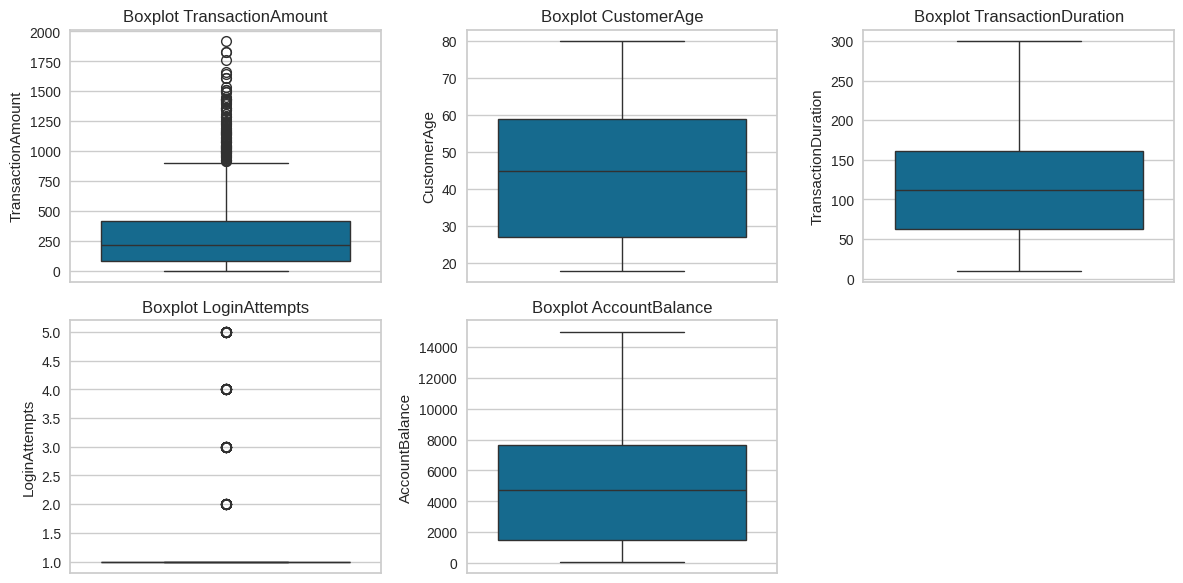

In [1209]:
# Boxplot untuk melihat outlier
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, len(numerical_columns)//2 + 1, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Ada banyak outliner pada `Transaction Amount`, yang bisa jadi indikasi adanya kegiatan fraud.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [1210]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans()
kmeans.fit(X_scaled)
model_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

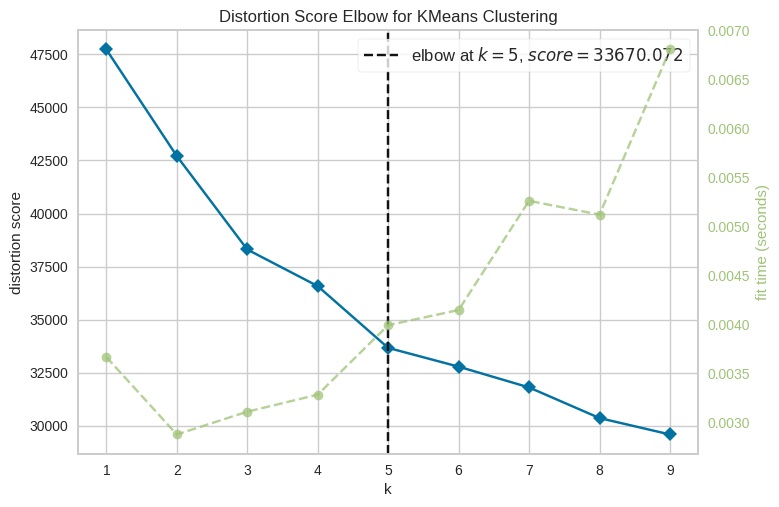

Silhouette Score: 0.1192


In [1211]:
# Membuat objek KMeans tanpa parameter awal
kmeans_model = KMeans()

# Menggunakan KElbowVisualizer untuk menemukan jumlah cluster terbaik
elbow_visualizer = KElbowVisualizer(kmeans_model, k=(1, 10))

# Menyesuaikan visualizer dengan data yang telah diskalakan
elbow_visualizer.fit(X_scaled)

# Menampilkan grafik untuk menganalisis titik elbow
elbow_visualizer.show()

# Menghitung Silhouette Score dengan menggunakan jarak Euclidean
sil_score = silhouette_score(X_scaled, labels=kmeans.labels_, metric='euclidean')

# Menampilkan Silhouette Score
print(f"Silhouette Score: {sil_score:.4f}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [1212]:
# Memilih 5 fitur terbaik menggunakan SelectKBest dan ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)

# Melakukan seleksi fitur dari data yang telah diskalakan
X_selected = selector.fit_transform(X_scaled, y=kmeans.labels_)

# Mengambil nama fitur yang lolos seleksi
selected_features = features.columns[selector.get_support(indices=True)]

# Menampilkan hasil fitur yang terpilih
print("Fitur-fitur terpilih:", list(selected_features))

Fitur-fitur terpilih: ['CustomerAge', 'AccountBalance', 'Channel_ATM', 'Channel_Online', 'Channel_Branch']


In [1213]:
# Melakukan reduksi dimensi ke dalam 2 komponen utama menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Membuat DataFrame dari hasil transformasi PCA
df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])

# Menambahkan informasi klaster ke dalam DataFrame
df_pca["Cluster"] = kmeans.labels_

In [1214]:
# Membuat objek KMeans dengan 3 klaster dan parameter inisialisasi acak
model_kmeans = KMeans(n_clusters=3, init='random', algorithm='lloyd', random_state=24)

# Melatih model menggunakan data hasil reduksi PCA
model_kmeans.fit(X_pca)

# Menambahkan hasil klaster ke DataFrame df_pca
df_pca["Cluster"] = model_kmeans.labels_

In [1215]:
# Mengukur kualitas hasil clustering menggunakan skor Silhouette
silhouette_avg = silhouette_score(X_pca, model_kmeans.labels_, metric='euclidean')

# Menampilkan hasil skor Silhouette dengan format empat angka desimal
print(f"Skor Silhouette yang diperoleh: {silhouette_avg:.4f}")

Skor Silhouette yang diperoleh: 0.9664


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

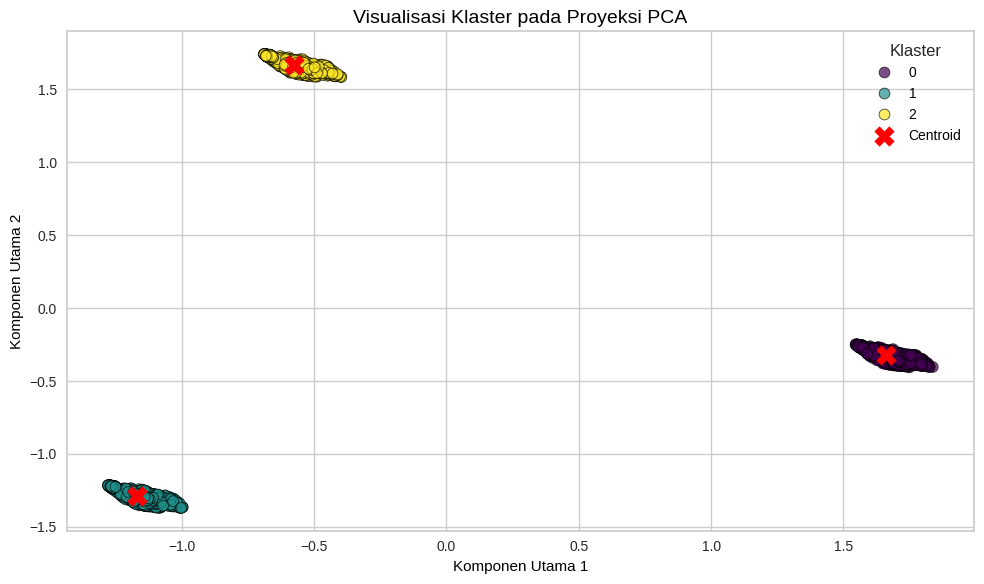

In [1216]:
# Visualisasi hasil clustering pada ruang dua dimensi hasil PCA
plt.figure(figsize=(10, 6))

# Scatter plot berdasarkan dua komponen utama dan label klaster
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="viridis",
    s=60,
    alpha=0.7,
    edgecolor="black"
)

# Menampilkan posisi centroid hasil clustering dalam ruang PCA
centroids_pca = model_kmeans.cluster_centers_
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    color="red",
    s=200,
    marker="X",
    label="Centroid"
)

# Mengatur tampilan visual plot
plt.title("Visualisasi Klaster pada Proyeksi PCA", color="black", fontsize=14)
plt.xlabel("Komponen Utama 1", color="black")
plt.ylabel("Komponen Utama 2", color="black")
plt.legend(title="Klaster", facecolor="white", edgecolor="black", labelcolor="black")
plt.grid(True)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [1217]:
# Membuat salinan dari DataFrame asli untuk normalisasi dan penambahan label klaster
df_normalized = df.copy()

# Menambahkan kolom 'Cluster' berdasarkan hasil clustering KMeans setelah PCA
df_normalized["Cluster"] = model_kmeans.labels_

In [1218]:
# Ubah kembali nilai numerik TransactionType ke bentuk kategorikal
df_normalized["TransactionType"] = df["TransactionType"].apply(lambda x: "Debit" if x == 0 else "Credit")

# Kembalikan nilai asli dari kolom 'Channel' hasil one-hot
df_normalized["Channel"] = df_normalized.loc[:, ["Channel_ATM", "Channel_Online", "Channel_Branch"]] \
                                       .idxmax(axis=1).str.extract(r"Channel_(.*)")

# Kembalikan nilai asli dari 'CustomerOccupation'
df_normalized["CustomerOccupation"] = df_normalized.loc[:, [
    "CustomerOccupation_Doctor", "CustomerOccupation_Student",
    "CustomerOccupation_Retired", "CustomerOccupation_Engineer"
]].idxmax(axis=1).str.extract(r"CustomerOccupation_(.*)")

# Hapus kolom-kolom one-hot encoding
df_normalized.drop(columns=[
    "Channel_ATM", "Channel_Online", "Channel_Branch",
    "CustomerOccupation_Doctor", "CustomerOccupation_Student",
    "CustomerOccupation_Retired", "CustomerOccupation_Engineer"
], inplace=True)

# Tampilkan data setelah transformasi ulang
df_normalized.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,CustomerAge,...,PreviousTransactionDate,TimeSinceLastTransaction,TransactionHour,TransactionFrequency,DeviceUsage,IPUsage,MerchantPreference,Cluster,Channel,CustomerOccupation
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,70,...,2024-11-04 08:08:08,-49477134.0,16,7,6,3,1,1,ATM,Doctor
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,68,...,2024-11-04 08:09:35,-42823516.0,16,7,5,4,1,1,ATM,Doctor
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,19,...,2024-11-04 08:07:04,-41694656.0,18,4,5,7,1,2,Online,Student
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,26,...,2024-11-04 08:09:06,-47403415.0,16,8,6,8,1,2,Online,Student
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,26,...,2024-11-04 08:06:39,-33228915.0,17,6,3,4,1,2,Online,Student


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [1219]:
# Ambil nama-nama kolom numerik dan buang kolom 'Cluster' karena tidak perlu dinormalisasi ulang
num_cols = df_normalized.select_dtypes(include=['number']).columns.drop('Cluster')

# Fit scaler dengan data fitur asli sebelum normalisasi
scaler.fit(features[num_cols])

# Kembalikan nilai kolom numerik ke skala aslinya menggunakan inverse transform
df_normalized[num_cols] = scaler.inverse_transform(df_normalized[num_cols])

# Tampilkan hasil akhir beberapa baris pertama
df_normalized.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,CustomerAge,...,PreviousTransactionDate,TimeSinceLastTransaction,TransactionHour,TransactionFrequency,DeviceUsage,IPUsage,MerchantPreference,Cluster,Channel,CustomerOccupation
0,TX000001,AC00128,4410.297491,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,1289.879913,...,2024-11-04 08:08:08,-4.546640e+14,28.320807,21.886277,15.573786,11.272876,1.275677,1,ATM,Doctor
1,TX000002,AC00455,110117.582785,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,1254.302601,...,2024-11-04 08:09:35,-3.935214e+14,28.320807,21.886277,13.739435,13.311021,1.275677,1,ATM,Doctor
2,TX000003,AC00019,37160.145372,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,382.658437,...,2024-11-04 08:07:04,-3.831479e+14,29.782634,15.124961,13.739435,19.425458,1.275677,2,Online,Student
3,TX000004,AC00070,54150.953261,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,507.179032,...,2024-11-04 08:09:06,-4.356078e+14,28.320807,24.140049,15.573786,21.463603,1.275677,2,Online,Student
4,TX000005,AC00411,4223.489090,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,507.179032,...,2024-11-04 08:06:39,-3.053530e+14,29.051720,19.632505,10.070731,13.311021,1.275677,2,Online,Student


In [1220]:
# Menampilkan ringkasan struktur DataFrame setelah seluruh transformasi,
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransactionID             2512 non-null   object        
 1   AccountID                 2512 non-null   object        
 2   TransactionAmount         2512 non-null   float64       
 3   TransactionDate           2512 non-null   datetime64[ns]
 4   TransactionType           2512 non-null   object        
 5   Location                  2512 non-null   object        
 6   DeviceID                  2512 non-null   object        
 7   IP Address                2512 non-null   object        
 8   MerchantID                2512 non-null   object        
 9   CustomerAge               2512 non-null   float64       
 10  TransactionDuration       2512 non-null   float64       
 11  LoginAttempts             2512 non-null   float64       
 12  AccountBalance      

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

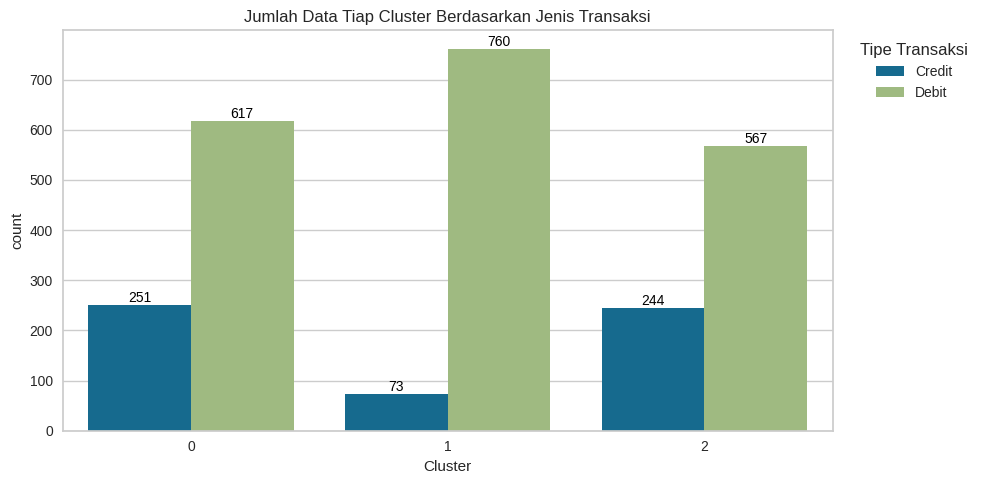

In [1221]:
# Membuat figure baru dengan ukuran lebar 10 dan tinggi 5
plt.figure(figsize=(10, 5))

# Visualisasi jumlah data per cluster berdasarkan tipe transaksi menggunakan countplot
visual = sns.countplot(data=df_normalized, x="Cluster", hue="TransactionType")

# Menambahkan judul ke grafik
plt.title("Jumlah Data Tiap Cluster Berdasarkan Jenis Transaksi")

# Memberi anotasi jumlah di atas setiap batang (bar)
for bar in visual.patches:
    tinggi = bar.get_height()
    if tinggi > 0:
        visual.text(bar.get_x() + bar.get_width() / 2, tinggi,
                    str(int(tinggi)), ha="center", va="bottom",
                    fontsize=10, color="black")

# Mengatur posisi legenda di luar grafik
plt.legend(title="Tipe Transaksi", bbox_to_anchor=(1.02, 1), loc="upper left")

# Menampilkan hasil plot
plt.tight_layout()
plt.show()

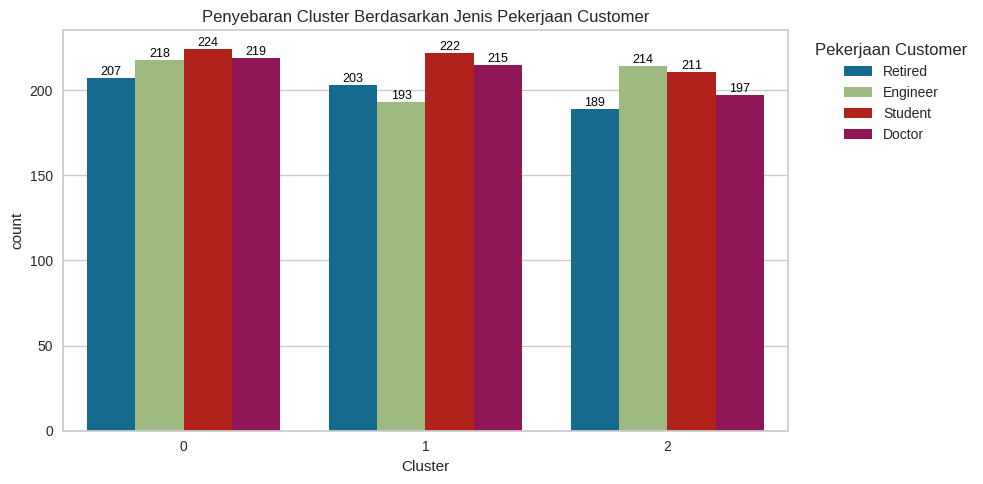

In [1222]:
# Membuat canvas plot dengan ukuran 10x5
plt.figure(figsize=(10, 5))

# Menampilkan jumlah masing-masing pekerjaan customer di tiap cluster menggunakan countplot
grafik = sns.countplot(data=df_normalized, x="Cluster", hue="CustomerOccupation")

# Menambahkan judul pada grafik
plt.title("Penyebaran Cluster Berdasarkan Jenis Pekerjaan Customer")

# Menambahkan label jumlah pada setiap batang grafik
for bar in grafik.containers[0].patches + grafik.containers[1].patches + grafik.containers[2].patches + grafik.containers[3].patches:
    jumlah = bar.get_height()
    if jumlah > 0:
        grafik.text(bar.get_x() + bar.get_width() / 2, jumlah,
                    str(int(jumlah)), ha="center", va="bottom",
                    fontsize=9, color="black")

plt.legend(title="Pekerjaan Customer", bbox_to_anchor=(1.02, 1), loc="upper left")

# Menampilkan hasil visualisasi
plt.tight_layout()
plt.show()

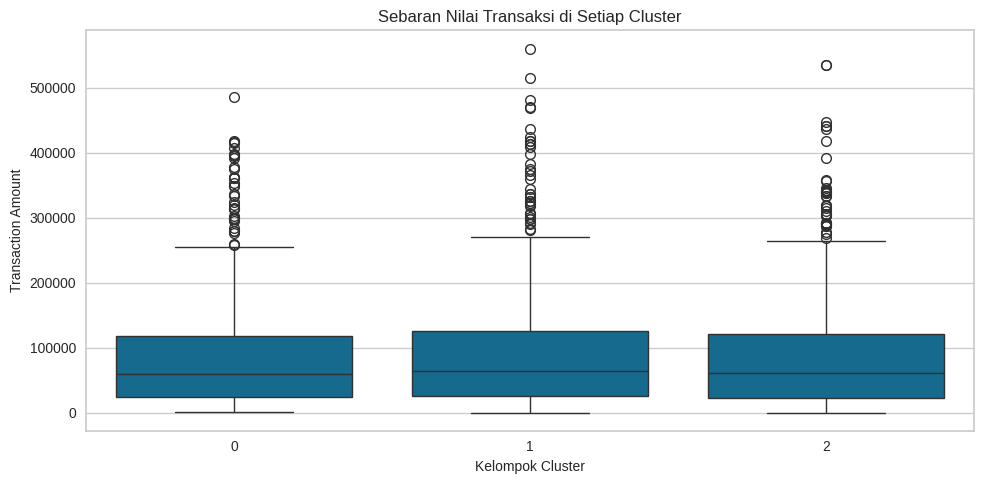

In [1223]:
# Membuat figure baru dengan ukuran lebar 10 dan tinggi 5
fig, axis = plt.subplots(figsize=(10, 5))

# Menampilkan boxplot untuk melihat distribusi jumlah transaksi pada tiap cluster
sns.boxplot(data=df_normalized, x="Cluster", y="TransactionAmount", ax=axis)

# Memberi judul dan label pada sumbu X dan Y
axis.set_title("Sebaran Nilai Transaksi di Setiap Cluster", fontsize=12)
axis.set_xlabel("Kelompok Cluster", fontsize=10)
axis.set_ylabel("Transaction Amount", fontsize=10)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

In [1224]:
# --- Menyiapkan Salinan Dataset untuk Analisis Cluster ---
data_analisis = df_normalized.copy()
data_asli = df.copy()

# Validasi: Pastikan data telah memiliki label klaster
if 'Cluster' not in data_analisis.columns:
    raise ValueError("Kolom 'Cluster' belum tersedia. Lakukan proses clustering terlebih dahulu.")

# --- Identifikasi Kolom Numerik ---
fitur_numerik = data_asli.select_dtypes(include='number').columns.tolist()
fitur_numerik = [kolom for kolom in fitur_numerik if kolom not in [
    'TransactionType', 'Cluster',
    'Channel_ATM', 'Channel_Online', 'Channel_Branch',
    'CustomerOccupation_Doctor', 'CustomerOccupation_Student',
    'CustomerOccupation_Retired', 'CustomerOccupation_Engineer'
]]

# --- Identifikasi Kolom Kategorikal ---
# Ambil fitur kategorikal dari data hasil normalisasi
fitur_kategorikal = data_analisis.select_dtypes(exclude='number').columns.tolist()
# Hilangkan kolom tanggal yang tidak akan dianalisis secara kategorikal
for kolom_tanggal in ['TransactionDate', 'PreviousTransactionDate']:
    if kolom_tanggal in fitur_kategorikal:
        fitur_kategorikal.remove(kolom_tanggal)

# --- Inverse Transformasi untuk Mengembalikan Skala Asli ---
# Gunakan kembali MinMaxScaler untuk mengembalikan skala fitur numerik ke bentuk aslinya
scaler = MinMaxScaler()
scaler.fit(data_asli[fitur_numerik])
data_analisis[fitur_numerik] = scaler.inverse_transform(data_analisis[fitur_numerik])

# --- Simulasi Label untuk Tujuan Evaluasi ---
# Jika belum tersedia label, buat kolom dummy 'Label' untuk menjaga struktur data
data_analisis['Label'] = 0
data_asli['Label'] = 0

# --- Persiapan Agregasi Fitur ---
# Buat dictionary untuk agregasi numerik (min, max, mean)
skema_agregasi = {fitur: ['min', 'max', 'mean'] for fitur in fitur_numerik}

# Tambahkan agregasi untuk fitur kategorikal (menggunakan nilai modus)
for fitur in fitur_kategorikal:
    skema_agregasi[fitur] = lambda x: x.mode()[0] if not x.mode().empty else None

# --- Lakukan Agregasi Berdasarkan Klaster ---
ringkasan_klaster = data_analisis.groupby('Cluster').agg(skema_agregasi)

# --- Interpretasi Setiap Cluster ---
hasil_interpretasi = []
for idx_klaster in ringkasan_klaster.index:
    deskripsi = f"Cluster {idx_klaster}\n"

    # Tambahkan ringkasan fitur numerik
    for fitur in fitur_numerik:
        nilai_min = ringkasan_klaster.loc[idx_klaster, (fitur, 'min')]
        nilai_maks = ringkasan_klaster.loc[idx_klaster, (fitur, 'max')]
        nilai_rata = ringkasan_klaster.loc[idx_klaster, (fitur, 'mean')]
        deskripsi += f"- Rata-rata {fitur}: {nilai_rata:.2f} (Min: {nilai_min:.2f}, Max: {nilai_maks:.2f})\n"

    # Tambahkan ringkasan fitur kategorikal
    for fitur in fitur_kategorikal:
        nilai_modus = ringkasan_klaster.loc[idx_klaster, fitur]
        deskripsi += f"- Modus {fitur}: {nilai_modus}\n"

    hasil_interpretasi.append(deskripsi)

# --- Tampilkan Hasil Interpretasi Cluster ---
for ringkasan in hasil_interpretasi:
    print(ringkasan)

Cluster 0
- Rata-rata TransactionAmount: 162005231.22 (Min: 823078.37, Max: 932744850.59)
- Rata-rata CustomerAge: 52010.27 (Min: 22639.93, Max: 91019.52)
- Rata-rata TransactionDuration: 2401513.85 (Min: 237561.07, Max: 6079770.84)
- Rata-rata LoginAttempts: 8.20 (Min: 7.91, Max: 17.55)
- Rata-rata AccountBalance: 301920399287.92 (Min: 6168948743.33, Max: 864884539508.37)
- Rata-rata TimeSinceLastTransaction: -12191456641370350944256.00 (Min: -16776248886823714029568.00, Max: -7684562555413822701568.00)
- Rata-rata TransactionHour: 73.57 (Min: 72.64, Max: 75.57)
- Rata-rata TransactionFrequency: 221.76 (Min: 93.00, Max: 365.71)
- Rata-rata DeviceUsage: 104.47 (Min: 52.22, Max: 169.61)
- Rata-rata IPUsage: 189.47 (Min: 87.36, Max: 380.85)
- Rata-rata MerchantPreference: 2.29 (Min: 2.28, Max: 2.50)
- Modus TransactionID: <lambda>    TX000008
Name: 0, dtype: object
- Modus AccountID: <lambda>    AC00005
Name: 0, dtype: object
- Modus TransactionType: <lambda>    Debit
Name: 0, dtype: obj

# Analisis Karakteristik Cluster dari Model KMeans

###**1. Cluster 0:**

- **TransactionAmount:** Memiliki rata-rata transaksi sebesar 162,005,231.22, dengan batas minimum 823,078.37 dan maksimum 932,744,850.59.
- **CustomerAge:** Memiliki rata-rata usia pelanggan sebesar 52,010.27, dengan batas minimum 22,639.93 dan maksimum 91,019.52.
- **TransactionDuration:** Memiliki rata-rata durasi transaksi sebesar 2,401,513.85, dengan batas minimum 237,561.07 dan maksimum 6,079,770.84.
- **LoginAttempts:** Memiliki rata-rata jumlah percobaan login sebesar 8.20, dengan batas minimum 7.91 dan maksimum 17.55.
- **AccountBalance:** Memiliki rata-rata saldo akun sebesar 301,920,399,287.92, dengan batas minimum 6,618,948,743.33 dan maksimum 864,884,539,508.37.
- **TimeSinceLastTransaction:** Memiliki rata-rata waktu sejak transaksi terakhir sebesar -12,191,456,641,370,350,944,256.00, dengan batas minimum -16,776,248,886,823,714,029,568.00 dan maksimum -7,684,562,555,413,822,701,568.00.
- **TransactionHour:** Memiliki rata-rata jam transaksi sebesar 73.57, dengan batas minimum 72.64 dan maksimum 75.57.
- **TransactionFrequency:** Memiliki rata-rata frekuensi transaksi sebesar 221.76, dengan batas minimum 93.00 dan maksimum 365.71.
- **DeviceUsage:** Memiliki rata-rata penggunaan perangkat sebesar 104.47, dengan batas minimum 52.22 dan maksimum 169.61.
- **IPUsage:** Memiliki rata-rata penggunaan IP sebesar 189.47, dengan batas minimum 87.36 dan maksimum 380.85.
- **MerchantPreference:** Memiliki rata-rata preferensi merchant sebesar 2.29, dengan batas minimum 2.28 dan maksimum 2.50.

- **TransactionID:** Modus adalah TX000008.
- **AccountID:** Modus adalah AC00005.
- **TransactionType:** Modus adalah Debit.
- **Location:** Modus adalah Los Angeles.
- **DeviceID:** Modus adalah D000281.
- **IP Address:** Modus adalah 200.136.146.93.
- **MerchantID:** Modus adalah M013.
- **Channel:** Modus adalah Branch.
- **CustomerOccupation:** Modus adalah Student.

**Analisis:**
Cluster 0 menampilkan nasabah dengan aktivitas transaksi tinggi, di mana rata-rata transaksi mencapai Rp162 juta dengan durasi yang lama, ditambah saldo akun yang sangat besar (lebih dari Rp301 miliar). Meskipun usia pelanggan tersebar luas (22-91 tahun), pola login yang konsisten dan frekuensi transaksi yang tinggi menunjukkan aktivitas yang intens, meskipun terdapat anomali pada data TimeSinceLastTransaction. Transaksi dilakukan terutama melalui cabang (Branch) dengan modus transaksi Debit, menandakan interaksi langsung, dan didominasi oleh nasabah dengan latar belakang student.

### **2. Cluster 1:**  
- **TransactionAmount:** Memiliki rata-rata transaksi sebesar 172,922,239.68, dengan batas minimum 750,266.73 dan maksimum 1,075,444,461.81.
- **CustomerAge:** Memiliki rata-rata usia pelanggan sebesar 52,374.45, dengan batas minimum 22,639.93 dan maksimum 91,019.52.
- **TransactionDuration:** Memiliki rata-rata durasi transaksi sebesar 2,511,382.31, dengan batas minimum 257,846.52 dan maksimum 6,120,341.74.
- **LoginAttempts:** Memiliki rata-rata jumlah percobaan login sebesar 8.21, dengan batas minimum 7.91 dan maksimum 17.55.
- **AccountBalance:** Memiliki rata-rata saldo akun sebesar 291,955,416,855.03, dengan batas minimum 6,618,617,344.14 dan maksimum 869,125,349,577.16.
- **TimeSinceLastTransaction:** Memiliki rata-rata waktu sejak transaksi terakhir sebesar -12,242,150,982,573,770,145,792.00, dengan batas minimum -16,776,231,830,937,084,624,896.00 dan maksimum -7,683,791,282,438,832,914,432.00.
- **TransactionHour:** Memiliki rata-rata jam transaksi sebesar 73.55, dengan batas minimum 72.64 dan maksimum 75.57.
- **TransactionFrequency:** Memiliki rata-rata frekuensi transaksi sebesar 217.49, dengan batas minimum 93.00 dan maksimum 365.71.
- **DeviceUsage:** Memiliki rata-rata penggunaan perangkat sebesar 104.59, dengan batas minimum 52.22 dan maksimum 169.61.
- **IPUsage:** Memiliki rata-rata penggunaan IP sebesar 188.33, dengan batas minimum 87.36 dan maksimum 380.85.
- **MerchantPreference:** Memiliki rata-rata preferensi merchant sebesar 2.29, dengan batas minimum 2.28 dan maksimum 2.50.

- **TransactionID:** Modus adalah TX000001.
- **AccountID:** Modus adalah AC00363.
- **TransactionType:** Modus adalah Debit.
- **Location:** Modus adalah Fort Worth.
- **DeviceID:** Modus adalah D000626.
- **IP Address:** Modus adalah 121.67.144.20.
- **MerchantID:** Modus adalah M070.
- **Channel:** Modus adalah ATM.
- **CustomerOccupation:** Modus adalah Student.

**Analisis:**  
Cluster 1 menampilkan nasabah dengan transaksi yang juga signifikan, dengan rata-rata transaksi sekitar Rp172 juta dan saldo akun yang besar, mencapai Rp291 miliar. Pengguna dalam cluster ini lebih sering melakukan transaksi melalui ATM, dan mereka berstatus student. Walaupun data waktu transaksi terakhir menunjukkan angka negatif yang besar, pola transaksi tetap konsisten dengan frekuensi tinggi. Seperti Cluster 0, nasabah memiliki usia yang bervariasi namun masih dalam kisaran yang cukup muda, dan menggunakan perangkat serta IP dengan tingkat intensitas yang serupa.

###**3. Cluster 2:**

- **TransactionAmount:** Memiliki rata-rata transaksi sebesar 167,037,893.25, dengan batas minimum 716,661.36 dan maksimum 1,026,106,174.85.
- **CustomerAge:** Memiliki rata-rata usia pelanggan sebesar 51,785.77, dengan batas minimum 22,639.93 dan maksimum 91,019.52.
- **TransactionDuration:** Memiliki rata-rata durasi transaksi sebesar 2,475,163.83, dengan batas minimum 237,561.07 dan maksimum 6,120,341.74.
- **LoginAttempts:** Memiliki rata-rata jumlah percobaan login sebesar 8.22, dengan batas minimum 7.91 dan maksimum 17.55.
- **AccountBalance:** Memiliki rata-rata saldo akun sebesar 296,348,123,665.19, dengan batas minimum 5,950,786,944.74 dan maksimum 863,542,496,316.54.
- **TimeSinceLastTransaction:** Memiliki rata-rata waktu sejak transaksi terakhir sebesar -12,090,812,278,258,345,705,472.00, dengan batas minimum -16,776,213,907,801,982,894,080.00 dan maksimum -7,682,172,418,623,260,327,936.00.
- **TransactionHour:** Memiliki rata-rata jam transaksi sebesar 73.55, dengan batas minimum 72.64 dan maksimum 75.57.
- **TransactionFrequency:** Memiliki rata-rata frekuensi transaksi sebesar 219.71, dengan batas minimum 93.00 dan maksimum 365.71.
- **DeviceUsage:** Memiliki rata-rata penggunaan perangkat sebesar 104.65, dengan batas minimum 52.22 dan maksimum 169.61.
- **IPUsage:** Memiliki rata-rata penggunaan IP sebesar 189.38, dengan batas minimum 87.36 dan maksimum 380.85.
- **MerchantPreference:** Memiliki rata-rata preferensi merchant sebesar 2.29, dengan batas minimum 2.28 dan maksimum 2.50.

- **TransactionID:** Modus adalah TX000003.
- **AccountID:** Modus adalah AC00362.
- **TransactionType:** Modus adalah Debit.
- **Location:** Modus adalah Seattle.
- **DeviceID:** Modus adalah D000451.
- **IP Address:** Modus adalah 146.69.70.214.
- **MerchantID:** Modus adalah M026.
- **Channel:** Modus adalah Online.
- **CustomerOccupation:** Modus adalah Engineer.

**Analisis:**  
Cluster 2 menampilkan nasabah dengan transaksi yang mirip dengan cluster sebelumnya, dengan rata-rata transaksi sekitar Rp167 juta dan saldo akun yang besar, mencapai Rp296 miliar. Nasabah di cluster ini lebih sering melakukan transaksi secara online dan berprofesi sebagai Engineer. Meskipun usia pelanggan cukup beragam, aktivitas mereka tetap menunjukkan pola transaksi yang konsisten, dengan frekuensi transaksi yang tinggi dan penggunaan perangkat serta IP yang cukup intens. Seperti cluster lainnya, nasabah memiliki angka waktu transaksi terakhir yang besar dan negatif.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1226]:
df_normalized.to_csv("hasil_clustering.csv", index=False)